# Linear Regression

In this workbook we adress the topic of linear regression, which is one of the simplest yet already powerful classifiers we can get.

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import utils.optimize as opt
import utils.metrics as mts
import utils.sampleTools as st


## Basic linear regression

let us create a random set for visualization :

In [2]:
rd = st.RandomSet(7,2000,mean=32,variance=20)
a = np.array([2,-1,7,2.5,1,1.1,-1.5])
aff = lambda x: np.sum(a*x)+25
rd.setMeans([1,23,4,5,-8,12,0.01])
rd.setVariances([1,0.1,34,25,0.5,7.8,0.5])
X = rd.getSet()
Y = rd.getTargets(aff,noise=2)
"""
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X,Y)
plt.show()
"""

'\nfig = plt.figure()\nax = fig.add_subplot(111)\nax.scatter(X,Y)\nplt.show()\n'

The correlation can be seen visually, let us compute it using the least square method :

In [3]:
def fit_regr(X,Y):
    Xtr = np.hstack((np.ones((X.shape[0],1)),X))
    Ytr = Y.reshape((Y.size,1))
    inv = np.linalg.inv(Xtr.T.dot(Xtr))
    return inv.dot(Xtr.T).dot(Ytr)

beta = fit_regr(X,Y)
print(beta)

[[52.7256907 ]
 [ 1.9425487 ]
 [-2.22307768]
 [ 6.99828469]
 [ 2.5032097 ]
 [ 0.93325741]
 [ 1.0957454 ]
 [-1.68387968]]


ValueError: x and y must be the same size

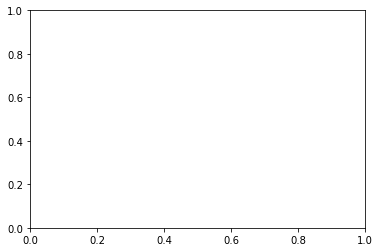

In [4]:
Xpred = np.linspace(0,70,200)
Ypred = beta[1]*Xpred + beta[0]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X,Y)
ax.plot(Xpred,Ypred,color="red")
plt.show()

let us warp this model properly in a basic class

In [5]:
class LinearRegression:
    def __init__(self):
        self.trained = False
        
    def fit(self,X,Y):
        Xtr = np.hstack((np.ones((X.shape[0],1)),X))
        Ytr = Y.reshape((Y.size,1))
        inv = np.linalg.inv(Xtr.T.dot(Xtr))
        self.beta = inv.dot(Xtr.T).dot(Ytr)
        self.trained = True
        
    def predict(self,X):
        if not self.trained :
            print("must be trained first")
        else :
            Xex = np.hstack((np.ones((X.shape[0],1)),X))
            return Xex.dot(self.beta)

next we test this predictor in a cross_validation setting :

In [6]:
nfolds = 10
cv_folds = st.getFolds(X,nfolds)
reg = LinearRegression()
meanRMSE = 0
for tr,ts in cv_folds:
    reg.fit(X[tr],Y[tr])
    Ypred = reg.predict(X[ts])
    meanRMSE += mts.rmse(Ypred,Y[ts])

print(meanRMSE/nfolds)

2799.3819428080383
